In [1]:
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize as norm
import gif
from IPython.display import Image

### Building the graph

C:\Users\seanj\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\seanj\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


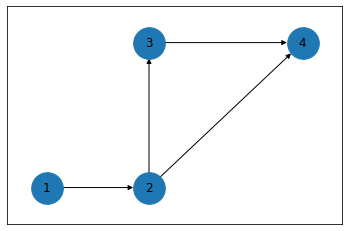

In [2]:
G = nx.DiGraph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(2,4)
n=4

pos = {1:[0.2,0.2],2:[.4,.2],3:[.4,.6],4:[.7,.6]}
nx.draw_networkx(G, pos, node_size=1000)

### Creating the wireless sensor matrix
The wireless sensor matrix $A_{wsn}$ is the adjacency matrix, plus the identity, row normalized. 

implementation note: nx will return a sparce matrix version of the adjacency matrix. In general, we will want to maintain the sparse storage. Due to the size of our example, we will use lil_matrix sparse matrix implenetation that is optimal for smaller matrices

In [3]:
def get_adj_matrix(G):
    A = nx.to_numpy_matrix(G)
    A = A + np.eye(A.shape[0])
    A = norm(A, norm='l1', axis=1)
    return A

A = get_adj_matrix(G)

### Simualte the Network Process

First we select a random intilization vector

In [4]:
x_0 = np.random.rand(4)

We then then simualte our time averaging system by multiplying our vector by A for n time-steps

In [5]:
t = 15
def simulate_network(A, x_0, t):
    states = np.zeros((t,A.shape[0]))
    states[0,:]=x_0
    for i in range(1,t):
        states[i,:] = A @ states[i-1,:]
    return states

We plot our simulation with the initial average as dashed-line

In [6]:
def plot_all_vals(states, t, legend=True):
    x_axis = np.arange(t)
    for i in range(states.shape[1]):
        plt.plot(x_axis, states[:,i], label=str(i+1))
    average = np.ones(t) * np.sum(x_0)/states.shape[1]
    plt.plot(x_axis, average, '--', label='average')
    if legend:
        plt.legend()


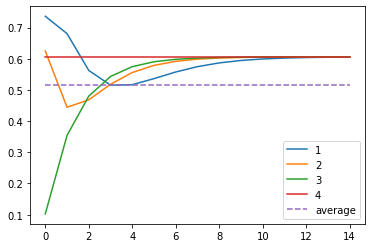

In [7]:
states = simulate_network(A,x_0, t)
plot_all_vals(states, t)

We can also visualize the dynamics by coloring each node by their value

In [8]:
@gif.frame
def plot_network(i, G, states, pos=None):
    # set nodal values
    #fig, axs= plt.subplots(nrows=2)
    plt.figure(figsize=(10,10))

    colors = states[i]
    cmap = plt.get_cmap('viridis')
    # draw with new color map
    nx.draw_networkx(G, pos, node_size=400, cmap=cmap,
                     node_color=colors, vmin=0, vmax=1)
    
    norm = mpl.colors.Normalize(vmin=0,vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm)


In [9]:
def save_and_display_network(G, states, filename, pos=None):
    frames = []
    for i in range(states.shape[0]):
        frame = plot_network(i, G, states, pos)
        frames.append(frame)

    gif.save(frames, filename, duration=600)
    with open(filename,'rb') as f:
        display(Image(data=f.read(), format='png'))

C:\Users\seanj\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\seanj\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


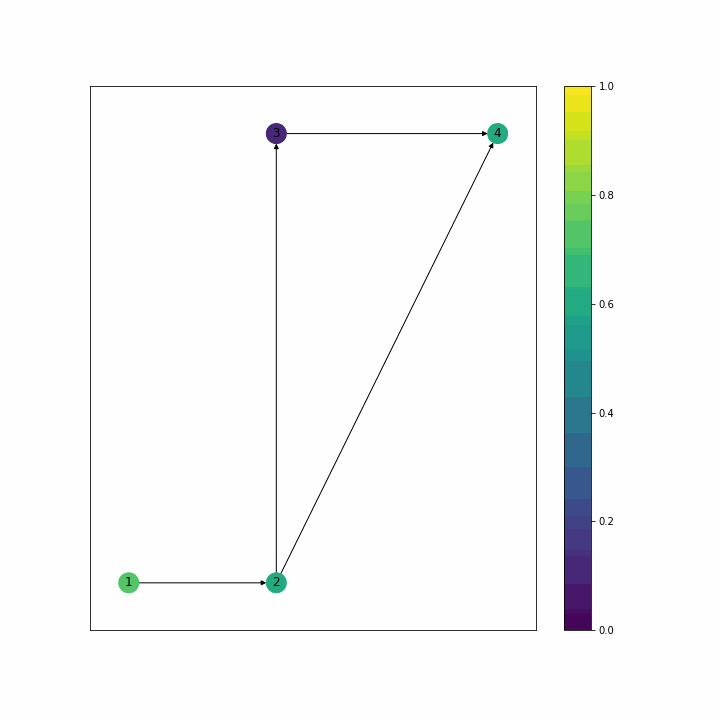

In [10]:
save_and_display_network(G, states, "small_wireless_example.gif", pos)

### Now With A Bigger Graph
We will run all of the steps above will a larger, randomly generated graph

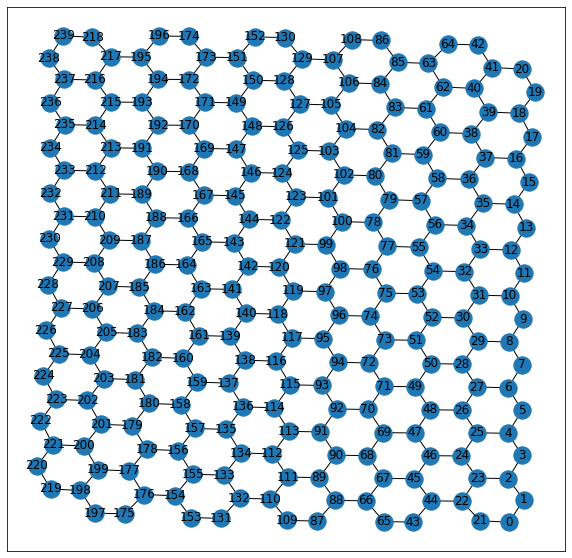

In [11]:
seed = 6
n = 100
m = 100


G_rand=nx.hexagonal_lattice_graph(10,10)
G_rand=nx.convert_node_labels_to_integers(G_rand)
pos = nx.kamada_kawai_layout(G_rand)
plt.figure(figsize=(10,10))
nx.draw_networkx(G_rand, pos)

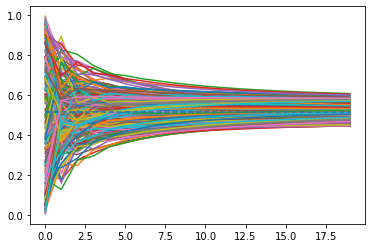

In [12]:
t=20
x_0 = np.random.rand(len(G_rand.nodes))
A = get_adj_matrix(G_rand)

states = simulate_network(A, x_0, t)
plot_all_vals(states, t, legend=False)

C:\Users\seanj\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


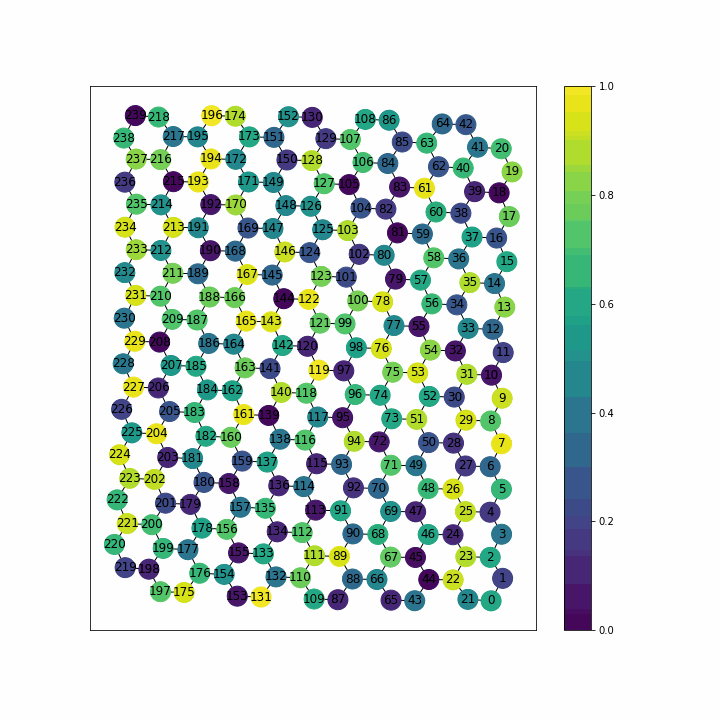

In [13]:
save_and_display_network(G_rand, states, "large_rand_wireless.gif", pos)